In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
train3=np.load('Classification/trainacc_3lay_180320.npy')
test3=np.load('Classification/testacc_3lay_180320.npy')
train2=np.load('Classification/trainacc_2lay_180320.npy')
test2=np.load('Classification/testacc_2lay_180320.npy')
img=cv2.imread('/home/makoto/Document/Anaconda/GNN-DGLPro/images/r_002.png',-1)
index=np.where(img[:,:,3]==0)
img[index]=[255,255,255,255]

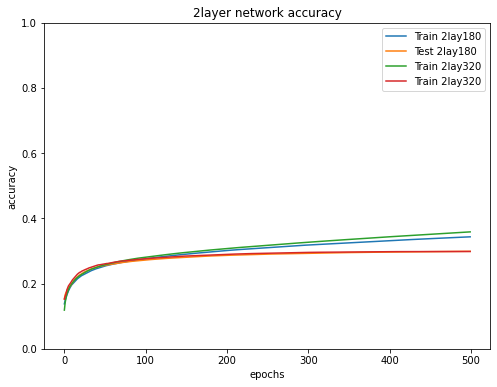

In [3]:
plt.figure(figsize=(8,6))
x=[i for i in range(len(train2[0]))]
plt.ylim(0,1)
plt.plot(x,train2[0],label='Train 2lay180')
plt.plot(x,test2[0],label='Test 2lay180')
plt.plot(x,train2[1],label='Train 2lay320')
plt.plot(x,test2[1],label='Train 2lay320')
plt.title('2layer network accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

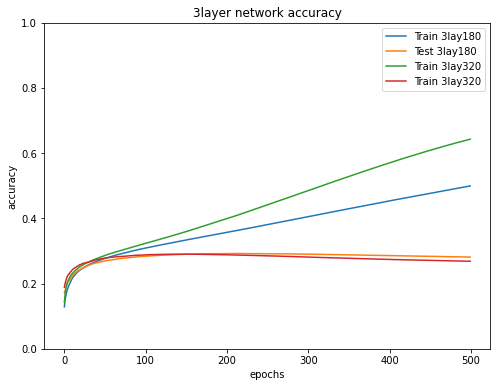

In [4]:
plt.figure(figsize=(8,6))
x=[i for i in range(len(train2[0]))]
plt.ylim(0,1)

plt.plot(x,train3[0],label='Train 3lay180')
plt.plot(x,test3[0],label='Test 3lay180')
plt.plot(x,train3[1],label='Train 3lay320')
plt.plot(x,test3[1],label='Train 3lay320')
plt.title('3layer network accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

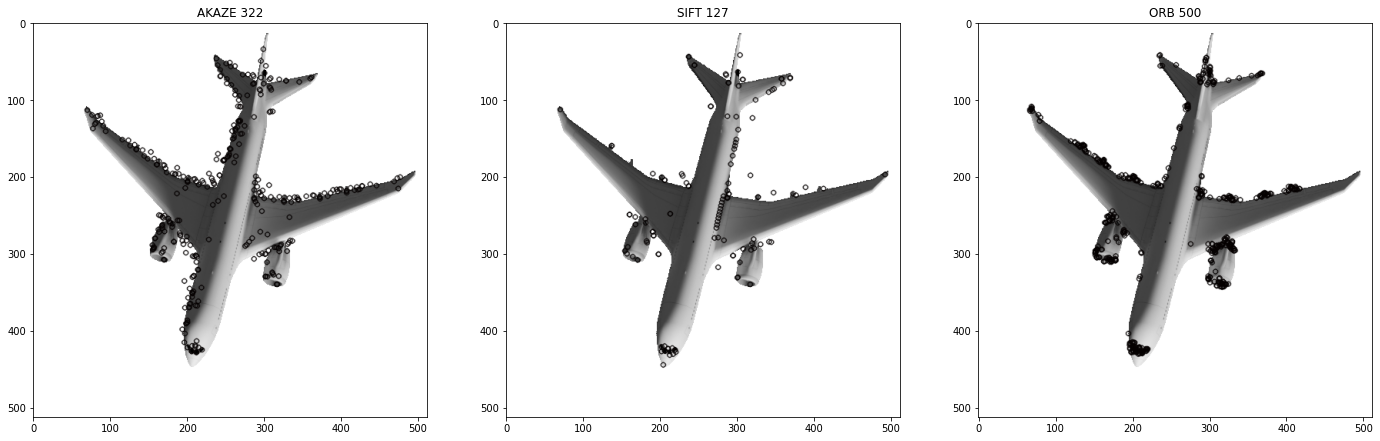

In [13]:
akaze=cv2.AKAZE_create()
sift=cv2.SIFT_create()
orb=cv2.ORB_create()

gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
up = cv2.resize(gray,(512,512),interpolation=cv2.INTER_LANCZOS4)
akazekp,akazedes=akaze.detectAndCompute(up,None)
akazeimg=cv2.drawKeypoints(up,akazekp,None,4)

up=cv2.normalize(up,None,0,255,cv2.NORM_MINMAX).astype('uint8')

orbkp,orbdes=orb.detectAndCompute(up,None)
siftkp,siftdes=sift.detectAndCompute(up,None)


orbimg=cv2.drawKeypoints(up,orbkp,None,4)
siftimg=cv2.drawKeypoints(up,siftkp,None,4)
plt.figure(figsize=(12*2,8*2))
plt.subplot(1,3,1)
plt.imshow(akazeimg)
plt.title(f'AKAZE {len(akazekp)}')

plt.subplot(1,3,2)
plt.imshow(siftimg)
plt.title(f'SIFT {len(siftkp)}')

plt.subplot(1,3,3)
plt.imshow(orbimg)
plt.title(f'ORB {len(orbkp)}')

plt.show()

In [11]:
print(orbdes[0].shape)

(32,)
